# Question 3: Build models using CBFV

**3.1 Regression**

For this problem you will be loading the `matbench_steels` dataset from the matbench benchmark datasets. (https://matbench.materialsproject.org/) To load this datasets, you will need the `matminer` package which can be installed via `pip install matminer` within your MatInformatics python virtual environment. 

a) Load the dataset and explore the distribution of yield strengths with a histogram or violin plot.

{'bodies': [<matplotlib.collections.PolyCollection at 0x12809fec0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x12937a120>,
 'cmins': <matplotlib.collections.LineCollection at 0x12937b8c0>,
 'cbars': <matplotlib.collections.LineCollection at 0x12937bf80>}

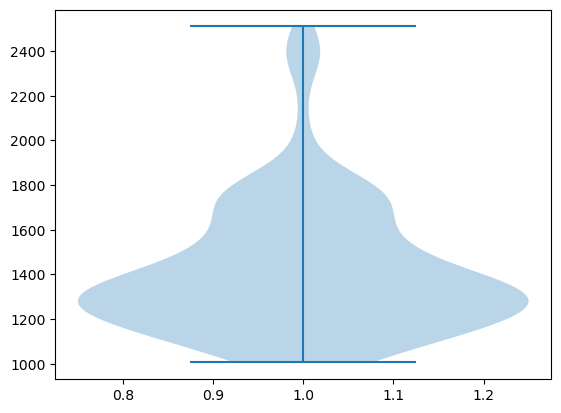

In [2]:
#your code goes here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matminer.datasets import load_dataset

# load the matbench_steel dataset
data = load_dataset("matbench_steels")
df = pd.DataFrame(data)
df.rename(columns={'composition': 'formula'}, inplace=True)
df.rename(columns={'yield strength': 'target'}, inplace=True)
df
# print a violin plot of the yield strengths
plt.violinplot(df['target'])


b) Featurize the data using the `CBFV` package. Create three featurized versions of the data: one with the `mat2vec` feature set, one with `magpie`, and one with `oliynyk`. 


In [3]:
#your code goes here
from CBFV import composition

xMV, yMV, formulaMV, skippedMV = composition.generate_features(df, elem_prop='mat2vec')
xMag, yMag, formulaMag, skippedMag = composition.generate_features(df, elem_prop='magpie')
xOli, yOli, formulaOli, skippedOli = composition.generate_features(df, elem_prop='oliynyk')



Processing Input Data: 100%|██████████| 312/312 [00:00<00:00, 7458.20it/s]


	Featurizing Compositions...


Assigning Features...: 100%|██████████| 312/312 [00:00<00:00, 18017.91it/s]


	Creating Pandas Objects...


Processing Input Data: 100%|██████████| 312/312 [00:00<00:00, 32547.95it/s]


	Featurizing Compositions...


Assigning Features...: 100%|██████████| 312/312 [00:00<00:00, 15897.74it/s]


	Creating Pandas Objects...


Processing Input Data: 100%|██████████| 312/312 [00:00<00:00, 32085.89it/s]


	Featurizing Compositions...


Assigning Features...: 100%|██████████| 312/312 [00:00<00:00, 19007.14it/s]

	Creating Pandas Objects...


c) Split the dataset into training and testing sets (80% training, 20% testing).



In [4]:
#your code goes here
dfTrain = df.sample(frac=0.8, random_state=0)
dfTest = df.drop(dfTrain.index)
# using the index of the df_train vairable index out values from the different model's variables and store them in their respective variables
xMVtrain = xMV.drop(dfTest.index)
xMVtest = xMV.drop(dfTrain.index)
yMVtrain = yMV.drop(dfTest.index)
yMVtest = yMV.drop(dfTrain.index)
xMagtrain = xMag.drop(dfTest.index)
xMagtest = xMag.drop(dfTrain.index)
yMagtrain = yMag.drop(dfTest.index)
yMagtest = yMag.drop(dfTrain.index)
xOlitrain = xOli.drop(dfTest.index)
xOlitest = xOli.drop(dfTrain.index)
yOlitrain = yOli.drop(dfTest.index)
yOlitest = yOli.drop(dfTrain.index)





d) Build linear models and compare the performance of 3 different featurization approaches. 

**don't worry if the results are bad! We will get to better models soon!** 


In [5]:
#your code goes here
import statsmodels.api as sm
import statsmodels.formula.api as smf


# train each feature set using the statsmodels library as a linear regression model

model1 = sm.OLS(yMVtrain, xMVtrain).fit() 
model2 = sm.OLS(yMagtrain, xMagtrain).fit()
model3 = sm.OLS(yOlitrain, xOlitrain).fit()

# predict the test results

yMVpred = model1.predict(xMVtest)
yMagpred = model2.predict(xMagtest)
yOlipred = model3.predict(xOlitest)

# print the performance of each of the models

print('Model 1: mat2vec')
print(model1.summary())
print('Model 2: magpie')
print(model2.summary())
print('Model 3: oliynyk')
print(model3.summary())




Model 1: mat2vec
                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     64.69
Date:                Thu, 01 Feb 2024   Prob (F-statistic):           1.06e-18
Time:                        09:08:14   Log-Likelihood:                -999.29
No. Observations:                 250   AIC:                             2449.
Df Residuals:                      25   BIC:                             3241.
Df Model:                         224                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
avg_0      -6.869e+04   3.38e+05   

e) For your best model, create a residual plot and a parity plot. 

Look for systematic patterns in your residual


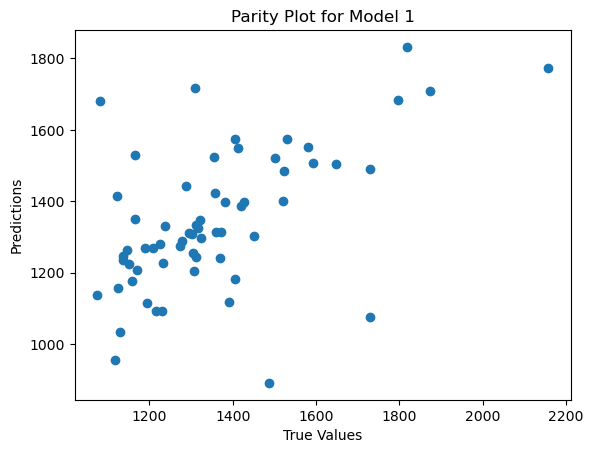

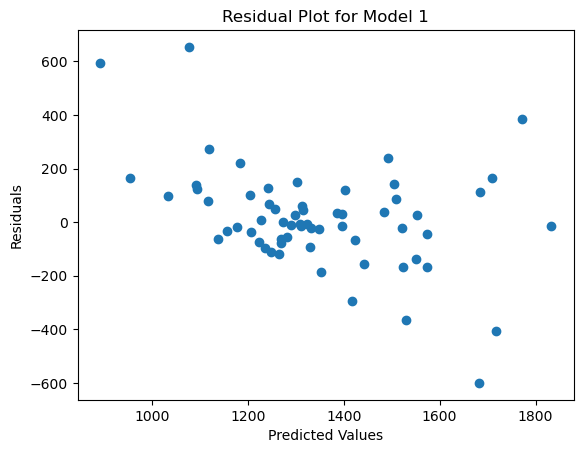

In [6]:
df1 = pd.DataFrame({'Actual': yMagtest, 'Predicted': yMagpred})

# remove the predicted values from df1 greater than 10000 (cleaning up the predicted results and removing huge outliers)
df1 = df1[df1['Predicted'] < 10000]

# remove the predicted values from df1 less than 0 (cleaning up the predicted results and removing huge outliers)
df1 = df1[df1['Predicted'] > 0]


# plot df1 as a scatter plot

plt.scatter(df1['Actual'], df1['Predicted'])
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Parity Plot for Model 1')
plt.show()

# create a residual plot for model1 using df1

plt.scatter(df1['Predicted'], df1['Actual'] - df1['Predicted'])
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Model 1')
plt.show()




f) Use your best model to predict the yield strength of a new steel composition Fe0.6Ni0.3Co0.2


In [7]:
# predict the yield strength of a steel with the following composition: Fe0.6Ni0.3Co0.2 using model1

X, y, formula, skipped = composition.generate_features(pd.DataFrame({'target':[0], 'formula': ['Fe0.6Ni0.3Co0.2']}), elem_prop='Magpie')

y_pred = model2.predict(X)
print(y_pred)



Processing Input Data: 100%|██████████| 1/1 [00:00<00:00, 6615.62it/s]


	Featurizing Compositions...


Assigning Features...: 100%|██████████| 1/1 [00:00<00:00, 7049.25it/s]

	Creating Pandas Objects...
0    9562.746032
dtype: float64


g) Now it's time to think about the model you've built and tried using! Discuss why this dataset was appropriate or not for the task given. 

**<span style="color:teal">put your discussion here</span>**

I think that this data set was pretty good for the use that we needed. I think that the biggest help would be using a better model. I think that providing the formula and the yield strength (and using a feature vector to expand on the formula) was suitable to train on. 

**3.2 Classification**

Now let's try a classification task! 

a) Download the `matbench_expt_is_metal` dataset, featurize with your choice of feature set, and employ a logistic regression (linear classifier). Report metrics and performance. 

In [8]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
data = load_dataset("matbench_expt_is_metal")
df = pd.DataFrame(data)
df.rename(columns={'composition': 'formula'}, inplace=True)
df.rename(columns={'is_metal': 'target'}, inplace=True)
df['target'] = df['target'].astype(int)

dfTrain = df.sample(frac=0.8, random_state=0)
dfTest = df.drop(dfTrain.index)

xTrain, yTrain, formulaTrain, skippedTrain = composition.generate_features(dfTrain, elem_prop='Magpie')
xTest, yTest, formulaTest, skippedTest = composition.generate_features(dfTest, elem_prop='Magpie')

model = sm.Logit(yTrain, xTrain)

result = model.fit()

print(result.summary())



Processing Input Data: 100%|██████████| 3937/3937 [00:00<00:00, 54518.42it/s]


	Featurizing Compositions...


Assigning Features...: 100%|██████████| 3937/3937 [00:00<00:00, 29398.79it/s]


	Creating Pandas Objects...


Processing Input Data: 100%|██████████| 984/984 [00:00<00:00, 55268.77it/s]


	Featurizing Compositions...


Assigning Features...: 100%|██████████| 984/984 [00:00<00:00, 27280.93it/s]


	Creating Pandas Objects...
         Current function value: 0.288210
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                 3937
Model:                          Logit   Df Residuals:                     3829
Method:                           MLE   Df Model:                          107
Date:                Thu, 01 Feb 2024   Pseudo R-squ.:                  0.5841
Time:                        09:08:15   Log-Likelihood:                -1134.7
converged:                      False   LL-Null:                       -2728.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
avg_Number                  0.7690      0.504      1.527      0.127      -0.218       1.75

/Users/stanleywessman/miniconda3/envs/MatInformatics/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
